In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotnine as pn

In [65]:
def import_vsweep(fpath="../schematic/data/vdd_sweep_data/dac7_LDS_Vdd-", num1=63, num2=9):
    list_df = []
    list_perchange = []
    percent = []
    for j in range(num1):
        for i in range(num2):
            df_tmp = pd.read_csv(fpath+str(j+1)+'-'+str(i+1)+".txt", delimiter="\s+")

            # Turn bits into binary
            df_tmp["v(b0)"] = (df_tmp["v(b0)"] > 1e-3).astype(float)
            df_tmp["v(b1)"] = (df_tmp["v(b1)"] > 1e-3).astype(float)
            df_tmp["v(b2)"] = (df_tmp["v(b2)"] > 1e-3).astype(float)
            df_tmp["v(b3)"] = (df_tmp["v(b3)"] > 1e-3).astype(float)
            df_tmp["v(b4)"] = (df_tmp["v(b4)"] > 1e-3).astype(float)
            df_tmp["v(b5)"] = (df_tmp["v(b5)"] > 1e-3).astype(float)
            df_tmp["v(b6)"] = (df_tmp["v(b6)"] > 1e-3).astype(float)
            df_tmp["src"] = np.ones(len(df_tmp.iloc[:, [1]]))*j
            df_tmp["lsb"] = df_tmp["i(vbias)"]/96

            # Calculate Percent change at 80%
            percent80 = df_tmp[df_tmp["v-sweep"]==1.78]
            percent0 = df_tmp[df_tmp["v-sweep"]==1.82]
            per_change = (abs(percent0["i(viout)"].values - percent80["i(viout)"].values)/percent0["i(viout)"].values)/(percent0["v-sweep"].values - percent80["v-sweep"].values)
            list_perchange.append(per_change)

            percent.append({'digital_input': j+1, 
                            'run': i+1, 
                            'percent_change':per_change[0]*100})
            
            df_tmp["diff"] = np.array([df_tmp.lsb.iloc[0]]+list(df_tmp["i(viout)"].iloc[1:].values - df_tmp["i(viout)"].iloc[0:-1].values))
        #     df_tmp["inl"] = df_tmp["dnl"].cumsum()
            list_df.append(df_tmp)
    return pd.concat(list_df).reset_index(drop=True), np.array(list_perchange)*100, percent

In [83]:
my_df, my_per, percents_list = import_vsweep(fpath="../schematic/data/vdd_sweep_data/dac7_LDS_Vdd-", num1=127, num2=100)
my_df["src"] = my_df["src"].astype("str")
my_df.tail()

,v-sweep,v(b0),v(b1),v(b2),v(b3),v(b4),v(b5),v(b6),i(vbias),i(viout),v(vout),src,lsb,diff
266695,1.830,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.589272e-07,1.907742e-07,0.8,126.0,1.655492e-09,1.288300e-11
266696,1.835,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.589272e-07,1.907826e-07,0.8,126.0,1.655492e-09,8.370000e-12
266697,1.840,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.589275e-07,1.907885e-07,0.8,126.0,1.655494e-09,5.926000e-12
266698,1.845,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.589276e-07,1.907916e-07,0.8,126.0,1.655496e-09,3.119000e-12
266699,1.850,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.589278e-07,1.907932e-07,0.8,126.0,1.655498e-09,1.634000e-12


In [84]:
percents_list

[{'digital_input': 1, 'run': 1, 'percent_change': 23.298068087580013},
 {'digital_input': 1, 'run': 2, 'percent_change': 23.298068087580013},
 {'digital_input': 1, 'run': 3, 'percent_change': 23.298068087580013},
 {'digital_input': 1, 'run': 4, 'percent_change': 23.298068087580013},
 {'digital_input': 1, 'run': 5, 'percent_change': 23.298068087580013},
 {'digital_input': 1, 'run': 6, 'percent_change': 23.298068087580013},
 {'digital_input': 1, 'run': 7, 'percent_change': 23.298068087580013},
 {'digital_input': 1, 'run': 8, 'percent_change': 23.298068087580013},
 {'digital_input': 1, 'run': 9, 'percent_change': 23.298068087580013},
 {'digital_input': 1, 'run': 10, 'percent_change': 23.298068087580013},
 {'digital_input': 1, 'run': 11, 'percent_change': 23.298068087580013},
 {'digital_input': 1, 'run': 12, 'percent_change': 23.298068087580013},
 {'digital_input': 1, 'run': 13, 'percent_change': 23.298068087580013},
 {'digital_input': 1, 'run': 14, 'percent_change': 23.298068087580013},
 

Text(0,0.5,'$I_{out}$ [A]')

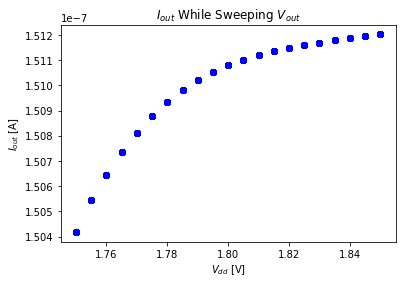

In [85]:
fig, ax = plt.subplots()
ax.plot(my_df[my_df.src == "100.0"]["v-sweep"], my_df[my_df.src == "100.0"]["i(viout)"], "bo", alpha=0.5)
ax.set_title("$I_{out}$ While Sweeping $V_{out}$")
ax.set_xlabel("$V_{dd}$ [V]")
ax.set_ylabel("$I_{out}$ [A]")

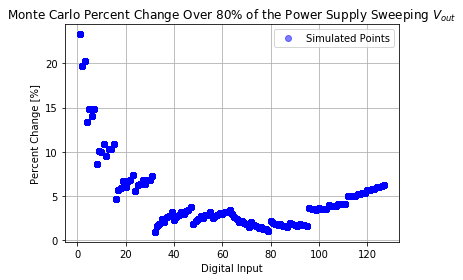

In [86]:
fig, ax = plt.subplots()

max_bit_input = 127

ax.plot(percents_list[0]['digital_input'], percents_list[0]['percent_change'], "bo", label = 'Simulated Points', alpha=0.5)

for i in range(len(percents_list)):
    ax.plot(percents_list[i]['digital_input'], percents_list[i]['percent_change'], "bo", alpha=0.5)
    
ax.set_title("Monte Carlo Percent Change Over 80% of the Power Supply Sweeping $V_{out}$")
ax.set_xlabel("Digital Input")
ax.set_ylabel("Percent Change [%]")
plt.grid(1)
#plt.hlines(0.5, 0, max_bit_input, label = "Design Specification")
ax.legend()

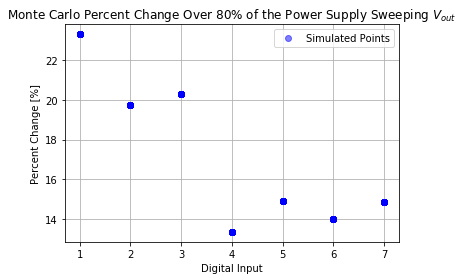

In [87]:
fig, ax = plt.subplots()

max_bit_input = 7

ax.plot(percents_list[0]['digital_input'], percents_list[0]['percent_change'], "bo", label = 'Simulated Points', alpha=0.5)

for i in range(len(percents_list)):
    if(percents_list[i]['digital_input'] <= max_bit_input):
        ax.plot(percents_list[i]['digital_input'], percents_list[i]['percent_change'], "bo", alpha=0.5)
    
ax.set_title("Monte Carlo Percent Change Over 80% of the Power Supply Sweeping $V_{out}$")
ax.set_xlabel("Digital Input")
ax.set_ylabel("Percent Change [%]")
plt.grid(1)
#plt.hlines(0.5, 0, max_bit_input, label = "Design Specification")
ax.legend()

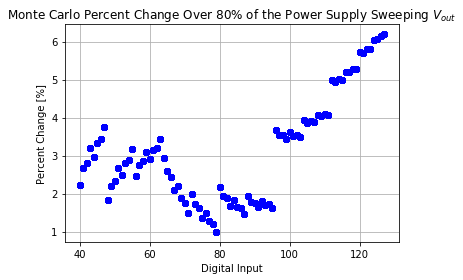

In [88]:
fig, ax = plt.subplots()

min_bit_input = 40

#ax.plot(percents_list[0]['digital_input'], percents_list[0]['percent_change'], "bo", label = 'Simulated Points', alpha=0.5)

for i in range(len(percents_list)):
    if(percents_list[i]['digital_input'] >= min_bit_input):
        ax.plot(percents_list[i]['digital_input'], percents_list[i]['percent_change'], "bo", alpha=0.5)
    
ax.set_title("Monte Carlo Percent Change Over 80% of the Power Supply Sweeping $V_{out}$")
ax.set_xlabel("Digital Input")
ax.set_ylabel("Percent Change [%]")
plt.grid(1)

In [89]:
data = []

for i in range(0, len(percents_list)):
    data.append(percents_list[i]['percent_change'])
    
sum(data)/len(percents_list)

4.682750985958893